<a href="https://colab.research.google.com/github/long-sleeper/diveintocode-ml/blob/master/term2/Sprint17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sprint 公開されている実装を動かす
### ＜目的＞  
- 公開されている実装を動かす際のノウハウを得る
- 論文で読んだ手法を動かしてみる


### ＜Faster R\CNN＞  
Faster R-CNN[1]の実装を動かします。

[1]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99

https://arxiv.org/pdf/1506.01497.pdf

以下のものを使用してください。Kerasを使用した実装です。

duckrabbits/ObjectDetection at master

In [ ]:
!pip install tensorflow==1.14

In [1]:
import tensorflow

In [ ]:
tensorflow.__version__

'1.14.0'

In [ ]:
!pip install keras==2.2.4

In [ ]:
!pip install kaggle

In [2]:
# 自分のマイドライブにマウントする

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# https://www.kaggle.com/　へアクセスし、ログイン後に右上のプロフィール画像をクリック、さらに"My Account"をクリックする
# このサイトの「API」項目にある"Create New API Token"をクリックすると、kaggle.jsonファイルが自動的にダウンロードされる
# ローカルで、kaggle.json（ダウンロードフォルダにあるはず）をエディターで開く。
# このセルの以下のコードにある token = {'username':'***','key':'***'} における「***」部分を、
# ダウンロードしたkaggle.jsonを参照して書き換え、このセルを実行する

import json

token = {"username":"longsleeper","key":"4dc577fcba9223305ba88c74b8b388cb"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!chmod 600 /content/.kaggle/kaggle.json

In [ ]:
# kaggle APIコマンドが使えるかどうかを確認


!kaggle competitions list

ref                                               deadline             category            reward  teamCount  userHasEntered  
------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                               2030-06-03 23:59:00  Getting Started      Kudos         31           False  
digit-recognizer                                  2030-01-01 00:00:00  Getting Started  Knowledge       3361           False  
titanic                                           2030-01-01 00:00:00  Getting Started  Knowledge      25530            True  
house-prices-advanced-regression-techniques       2030-01-01 00:00:00  Getting Started  Knowledge       5731            True  
connectx                                          2030-01-01 00:00:00  Getting Started  Knowledge        555           False  
nlp-getting-started                               2030-01-01 00:00:00  Getting Started      Kudos       1809   

In [ ]:
# simpsonデータセットのAPIコマンドでデータセットをダウンロードする
# APIコマンドはこちらのサイトを参照。https://www.kaggle.com/alexattia/the-simpsons-characters-dataset

!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

 99% 1.07G/1.08G [00:22<00:00, 42.2MB/s]
100% 1.08G/1.08G [00:22<00:00, 50.8MB/s]


In [ ]:
!unzip /content/drive/'My Drive'/the-simpsons-characters-dataset.zip  -d Simpsons

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: Simpsons/simpsons_dataset/simpsons_dataset

In [ ]:
!git clone https://github.com/duckrabbits/ObjectDetection.git

Cloning into 'ObjectDetection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 46 (delta 3), reused 6 (delta 1), pack-reused 28
Unpacking objects: 100% (46/46), done.


In [ ]:
# https://github.com/duckrabbits/ObjectDetection/tree/master
# この後、上述のgithubのreadmeに沿って、simpsons_datasetフォルダをプロジェクトフォルダ配下に格納しましょう。
# testデータなども同様に準備してみよう。

### 【問題1】学習と推定  
READMEを参考に上記実装を動かしてください。

In [ ]:
% cd ObjectDetection/
! python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20200622-135037_config.pickle
-------------------------------
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer) 

In [ ]:
! python predict.py -i /content/drive/'My Drive'/'ObjectDetection'/simpsons_testset -c ./save/train_20200622-135037_config.pickle

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


2020-06-22 13:57:44.097086: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-22 13:57:44.114769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-22 13:57:44.115524: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-06-22 13:57:44.115812: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-06-22 13:57:44.116989: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-06-22 13:57:44.118117: I tens

学習済みモデルで、テストデータを予測

/content/drive/My Drive/ObjectDetection/output


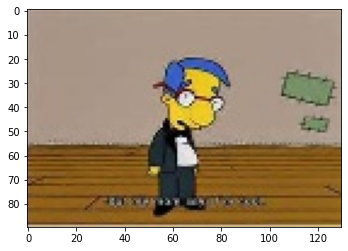

In [ ]:
%cd /content/drive/My Drive/ObjectDetection/output

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = Image.open("/content/drive/My Drive/ObjectDetection/output/result_milhouse_van_houten_48.jpg.png")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

テスト用画像がそのまま返り、枠は表示されない

### 【問題2】コードリーディング  
上記実装のコードリーディングを行ってください。  
まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

### ＜回答＞
重要と思う部分として以下を挙げる  
1. RPN
2. RoI Pooling
3. Anchor
4. IOU

関係すると思われるコードを以下に抜き出す

1. RPN  
CNNからの特徴マップをもとに、物体の候補領域抽出を行う畳み込みネットワークで、後述するanchorが物体か背景かを予測する分類（$cls$）全結合層と、anchorの座標とサイズを予測する回帰子（$reg$）全結合層をもつ。
RPNでは、畳み込み層からの出力を受け取り、window-sliding毎に $k$ 通りのanchorを考慮する。$k$ はアスペクト比とサイズの組み合わせで決まり、defaultでは3×3＝9。

In [ ]:
# <resnet.py>
# num_anchorsを引数にとる
def rpn(base_layers,num_anchors):
    x = Convolution2D(512, (3, 3), padding='same', activation='relu', kernel_initializer='normal', name='rpn_conv1')(base_layers)
    # cls層
    x_class = Convolution2D(num_anchors, (1, 1), activation='sigmoid', kernel_initializer='uniform', name='rpn_out_class')(x)
    # reg層
    x_regr = Convolution2D(num_anchors * 4, (1, 1), activation='linear', kernel_initializer='zero', name='rpn_out_regress')(x)

    return [x_class, x_regr, base_layers]

2. RoI Pooling  
RoI (Region of Interest) プーリングは、畳み込み層からの様々なサイズの候補領域入力（RoI）に対して最大プーリングを使用し、固定サイズ($H\times W$, 例えば7×7）の特徴ベクトルを生成する手法。RoIは左上からの位置 ($r,c$) と高さ・幅（$h,w$）の4つのタプル($r,c,h,w$)で定義しており、特徴量マップ上の長方形の領域である。この領域を$h/H\times w/W$のグリッドに分けて最大プーリングすることで、入力サイズに関わらず固定サイズの特徴ベクトルを生成できる。

In [ ]:
# <RoiPoolingConv.py の class RoiPoolingConv()内 >
def call(self, x, mask=None):
        assert(len(x) == 2)
        img = x[0]
        rois = x[1]
        input_shape = K.shape(img)
        outputs = []

        for roi_idx in range(self.num_rois):
          　# RoIのサイズ
            x = rois[0, roi_idx, 0]
            y = rois[0, roi_idx, 1]
            w = rois[0, roi_idx, 2]
            h = rois[0, roi_idx, 3]
            # グリッドの高さ・幅を計算
            row_length = w / float(self.pool_size)
            col_length = h / float(self.pool_size)

            num_pool_regions = self.pool_size

            #NOTE: the RoiPooling implementation differs between theano and tensorflow due to the lack of a resize op
            # in theano. The theano implementation is much less efficient and leads to long compile times

            if self.dim_ordering == 'channels_first':
                for jy in range(num_pool_regions):
                    for ix in range(num_pool_regions):
                        x1 = x + ix * row_length
                        x2 = x1 + row_length
                        y1 = y + jy * col_length
                        y2 = y1 + col_length

                        x1 = K.cast(x1, 'int32')
                        x2 = K.cast(x2, 'int32')
                        y1 = K.cast(y1, 'int32')
                        y2 = K.cast(y2, 'int32')
　　　　　　　　　　　　# 各グリッドにつき最大プーリング
                        x2 = x1 + K.maximum(1,x2-x1)
                        y2 = y1 + K.maximum(1,y2-y1)

                        new_shape = [input_shape[0], input_shape[1],
                                     y2 - y1, x2 - x1]

                        x_crop = img[:, :, y1:y2, x1:x2]
                        xm = K.reshape(x_crop, new_shape)
                        pooled_val = K.max(xm, axis=(2, 3))
                        outputs.append(pooled_val)

3. Anchor  
window-sliding毎に $k$ 通りのanchorを考慮する。$k$ はアスペクト比とサイズの組み合わせで決まり、defaultでは3×3＝9。このanchor毎に候補領域とその中にあるものが物体か否かの予測を行い、物体である可能性の高いbound boxの提案を行う。

In [ ]:
 # <faster_rcnn.py>
 # define the RPN, built on the base layers
    num_anchors = len(C.anchor_box_scales) * len(C.anchor_box_ratios)
    rpn = nn.rpn(shared_layers, num_anchors)

4. IoU  
IoU(Intersection over Union)値とは、画像の重なりの割合を表す値であり、この値が大きいほど画像が重なっている状態ということになる。Faster R-CNNではIOUに閾値を与え、0.3<IOU<0.7の画像は利用しないことで無駄な計算を抑えている。

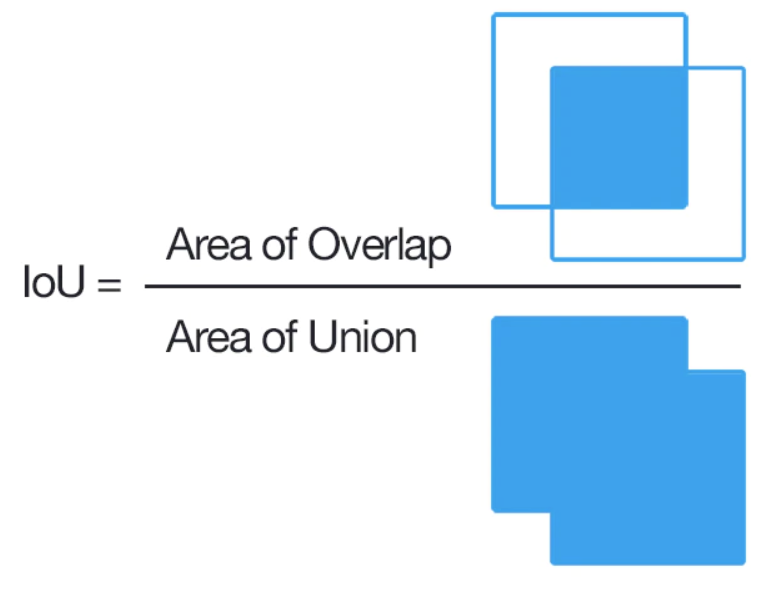

In [ ]:
Image('/content/drive/My Drive/keras-yolo3/a.png')

In [ ]:
# <train.py>
 X, Y, img_data = next(data_gen_train)
loss_rpn = model_rpn.train_on_batch(X, Y)
P_rpn = model_rpn.predict_on_batch(X)

# overlap_tresh=0.7でIoUに閾値を設定
# 提案領域の最大数も300に制限している
R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_data_format(), use_regr=True, 
                           overlap_thresh=0.7, max_boxes=300)

# note: calc_iou converts from (x1,y1,x2,y2) to (x,y,w,h) format
X2, Y1, Y2 = roi_helpers.calc_iou(R, img_data, C, class_mapping)

### ＜YOLOv3＞  

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。YOLOv3[2]のKeras実装を使います。

qqwweee/keras-yolo3: A Keras implementation of YOLOv3 (Tensorflow backend)

[2]Jeseph Redmon, Ali Farhadi. YOLOv3: An Incremental Improvement

https://pjreddie.com/media/files/papers/YOLOv3.pdf


### 【問題3】学習済みの重みによる推定  
学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startの項に記載されています。  
まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。  
出力結果を課題の一部として提出してください。

In [ ]:
! git clone https://github.com/qqwweee/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 3.98 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [ ]:
% cd /content/drive/My Drive/keras-yolo3
! wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-22 14:20:57--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   284KB/s    in 14m 55s 

2020-06-22 14:35:54 (270 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2020-06-23 03:54:33.877809: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-23 03:54:33.897169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-23 03:54:33.897994: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-06-23 03:54:33.898496: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2

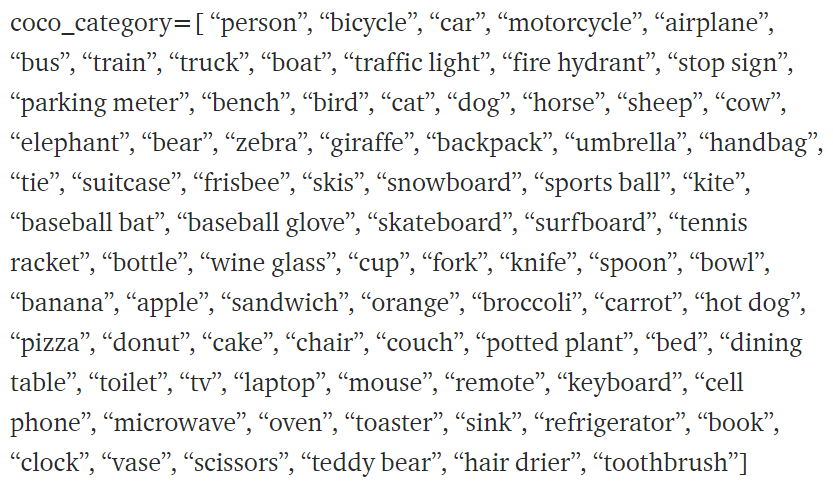

In [ ]:
# yolov3が学習済みのCOCOデータセットの80種類のカテゴリ
from IPython.display import Image
Image('/content/drive/My Drive/Colab Notebooks/COCO_category.png')

In [ ]:
!python yolo_video.py --image 

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
2020-06-22 14:59:44.686240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-22 14:59:44.703926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-22 14:59:44.704680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2020-06-22 14:59:44.705208: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2020-06-22 14:59:44.707528: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2020-06-22 14:59:44.718732: I ten

### darknet導入

In [ ]:
git clone https://github.com/pjreddie/darknet
cd darknet
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...
Checking out files: 100% (979/979), done.


In [ ]:
%cd /content/drive/'My Drive'/darknet
!wget https://pjreddie.com/media/files/yolov3.weights

/content/drive/My Drive/darknet
--2020-06-22 15:25:24--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   426KB/s    in 11m 31s 

2020-06-22 15:36:56 (351 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/fruits.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

果物の画像を予測

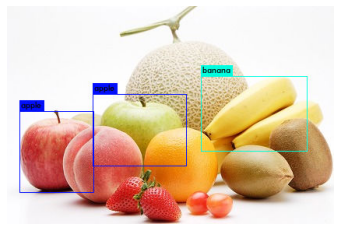

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

オレンジも学習済みのはずだが、リンゴとバナナのみ認識

続いて、動物の画像を予測

In [ ]:
%cd /content/drive/'My Drive'/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/animals.jpg

/content/drive/My Drive/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11

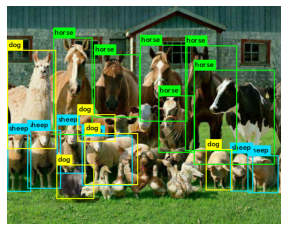

In [ ]:
file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

リャマや豚も犬と認識されている

次いで、乗り物の画像を予測

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/vehicle.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

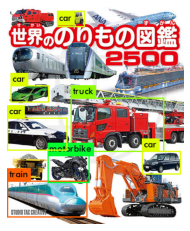

In [ ]:
file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

飛行機も学習済みのはずだが、文字に隠れて認識されない

続いて、スポーツの画像を予測

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/sports.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

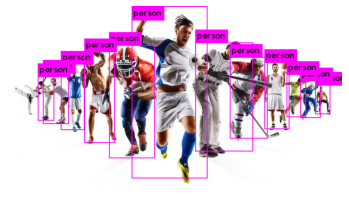

In [ ]:
file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

グローブやバットも学習済みのはずだが、人しか認識しない

続いて、キッチン回りの画像を予測

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/kitchen.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

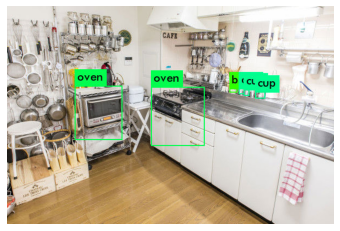

In [ ]:
file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

電子レンジもコンロもオーブンと認識される

続いて、カトラリーの画像を予測

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/cutlery.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

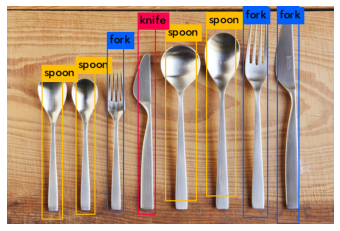

In [ ]:
file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

一番右のナイフ以外は、正しく認識される

### 【問題4】学習のためのファイルを作成  
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingの項を読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。  
アノテーションファイルの形式が問題1の実装とは異なるため変換する必要があります。

1. 元のアノテーションファイルをcsv形式にした後に読み込む
2. 正解ラベル（キャラ名）列をラベルエンコードする
3. 画像名ラベルと枠の最初の座標ラベルをスペースを挟んで結合する
4. csvとして出力

上記の手順で作成する

In [ ]:
import pandas as pd
% cd /content/drive/My Drive/keras-yolo3
df = pd.read_csv('/content/drive/My Drive/keras-yolo3/annotation.csv')
display(df.head())

/content/drive/My Drive/keras-yolo3


,a,b,c,d,e,f
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,57,72,52,72,abraham_grampa_simpson
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,80,31,337,354,abraham_grampa_simpson
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,128,48,285,407,abraham_grampa_simpson
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,126,158,275,abraham_grampa_simpson
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,123,61,294,416,abraham_grampa_simpson


In [ ]:
# ラベルエンコード
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['f'] = le.fit_transform(df['f'].values)
df.head()

# a列とb列をスペースを挟み結合
img_name = df['a'].str.cat(df['b'].astype(str), sep=' ')
img_name

# c列以降を上記と結合
df_train = pd.concat([img_name, df.iloc[:, 2:]], axis=1)
df_train.head()

,a,c,d,e,f
0,simpsons_dataset/abraham_grampa_simpson/pic_00...,72,52,72,0
1,simpsons_dataset/abraham_grampa_simpson/pic_00...,31,337,354,0
2,simpsons_dataset/abraham_grampa_simpson/pic_00...,48,285,407,0
3,simpsons_dataset/abraham_grampa_simpson/pic_00...,126,158,275,0
4,simpsons_dataset/abraham_grampa_simpson/pic_00...,61,294,416,0


In [ ]:
# csvとして出力
df_train.to_csv('sympsons_train', index=False, header=False)

### 【問題5】学習が行えることの確認  
問題4で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [ ]:
% cd /content/drive/My Drive/keras-yolo3

/content/drive/My Drive/keras-yolo3


In [ ]:
! python train.py

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

lossは減少しているため、学習できているようだ

### 【問題6】（アドバンス課題）コードリーディング  
上記実装のコードリーディングを行ってください。  
まず、YOLOv3[2]の論文において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

今回はコードリーディングまでは行わず、YOLOv3の概要を調査して終わりにする

### ＜YOLO＞
【概要】  
- YOLO (You only look once) は予め画像全体をグリッド分割し、各領域ごとに物体のクラスとbounding boxを求める、という方法を採用。
- Faster R-CNNに識別精度は少し劣るが、検出速度はリアルタイムも可能なほど速い。
- スライディングウィンドウや領域候補(Region Proposal)と違い1枚の画像の全範囲を学習するため、物体の周辺も学習でき背景の誤検出はFast R-CNNの約半分。

【欠点】
- 分割されたグリッドサイズは固定かつ、グリッド内で識別できるクラスは1つ
- 検出できる物体の数は2つ
という制約があるため、 グリッド内に大量の物体がある場合に弱い。

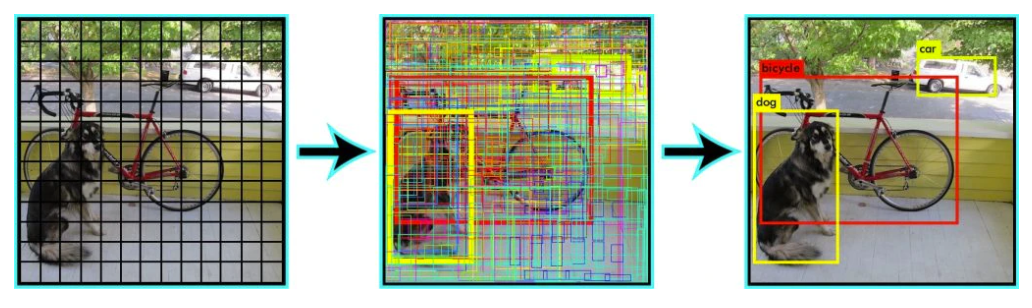

In [ ]:
Image('/content/drive/My Drive/keras-yolo3/yolo_1.png')

### ＜YOLOv3＞  
【prior】  
- YOLOv3では事前情報として、「データセットにどのくらいのサイズの画像があるか」という情報を使っている。（priorのサイズ）
- その情報は正解ラベルのbounding box幅をk-meansによって9つにクラスタリングして得る。
- このpriorのサイズを基準に予測するbounding boxのwidthとheightが決まり、正解データのbounding boxとの重なり (IoU) が最も大きいpriorサイズのboxのObjectness scoreを1とする。

【UpSampling】
- Deep CNNでは、層が深くなるにつれ位置情報が失われていくため、小さな物体の予測時にはUpSamlingにより相対的な位置情報を補填している？


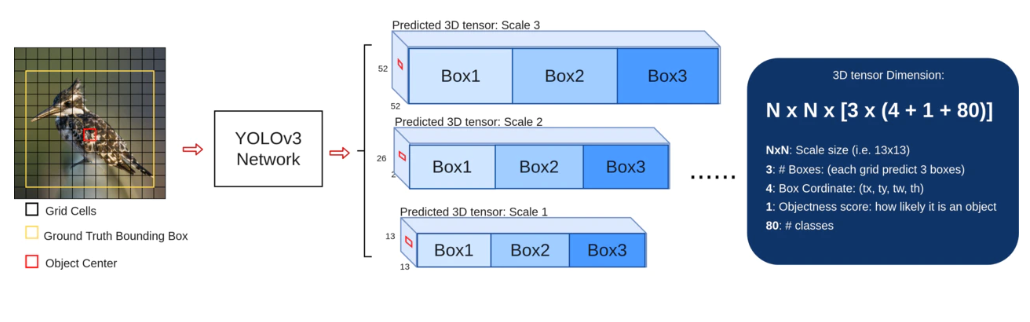

In [ ]:
Image('/content/drive/My Drive/keras-yolo3/yolo_3.png')

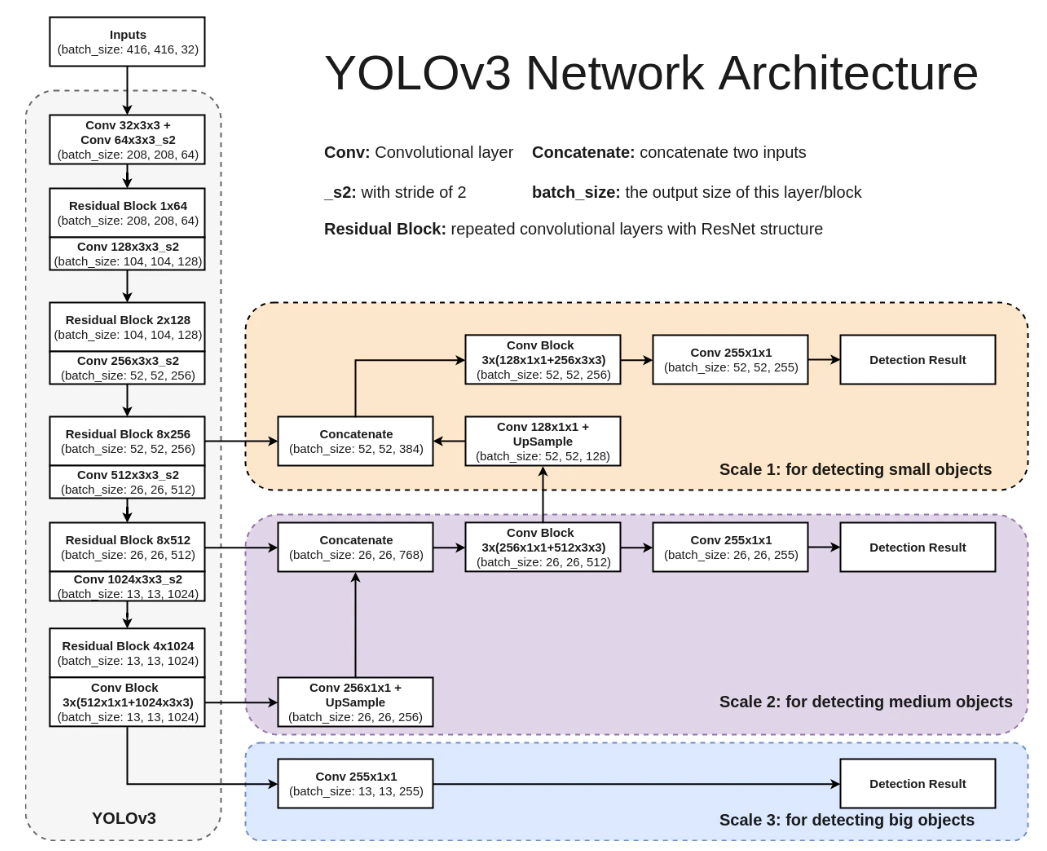

In [ ]:
Image('/content/drive/My Drive/keras-yolo3/yolo_2.png')